# Tuagas 6 ( UTS ) : Keyword extraction

Keyword extraction adalah proses otomatis untuk mengidentifikasi dan mengekstrak kata-kata atau frasa yang paling penting atau relevan dari suatu dokumen teks.

- **Tujuan utama dari keyword extraction** adalah untuk menemukan istilah kunci yang mewakili inti dari suatu teks tanpa harus membaca seluruh dokumen. Ini sangat berguna untuk berbagai tugas seperti pengindeksan, pencarian informasi, dan analisis teks.

- **Cara Kerja Keyword Extraction**
Keyword extraction bekerja dengan mengidentifikasi kata-kata atau frasa yang memiliki peran penting dalam sebuah teks berdasarkan frekuensi kemunculannya, posisinya dalam teks, atau hubungan semantisnya dengan kata-kata lain.

## 1. Import Librery

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## import data

In [ ]:
data = pd.read_csv('data_terbaru_1.csv')
data

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,Serba-serbi Acara Pembekalan Calon Menteri Pra...,Reporter\nDaniel A. Fajri\nEditor\nAndry Triya...,16-10-2024 05:30,Nasional
1,"Diberhentikan Sepihak, Konsil Tenaga Kesehatan...",Reporter\nAnastasya Lavenia Y\nEditor\nNinis C...,16-10-2024 07:30,Nasional
2,"Bahlil Sidang Promosi Doktor Siang Ini, Selesa...",Reporter\nHendrik Yaputra\nEditor\nJuli Hantor...,16-10-2024 04:30,Nasional
3,Bahlil Lahadalia Resmi Sandang Gelar Doktor de...,Reporter\nM. Rizki Yusrial\nEditor\nGrace gand...,16-10-2024 11:30,Bisnis
4,"PPN 12 Persen Berlaku 1 Januari 2025, Ini Daft...",Reporter\nMelynda Dwi Puspita\nEditor\nRr. Ari...,16-10-2024 03:30,Bisnis
...,...,...,...,...
145,BPJS Kesehatan Tingkatkan Efektivitas Layanan ...,"Rabu, 16 Oktober 2024 10:15 WIB\nBagikan\nINFO...",16-10-2024 03:34,Nasional
146,Siapa Saja Calon Wamenkeu yang Bakal Mendampin...,Reporter\nHaura Hamidah\nEditor\nNurhadi\nRabu...,16-10-2024 07:34,Nasional
147,"Menjelang Pensiun, Jokowi Mengaku Belum Beli T...",Reporter\nHendrik Yaputra\nEditor\nJuli Hantor...,16-10-2024 08:34,Nasional
148,Jubir Ungkap Alasan Prabowo akan Bergerak Mena...,"Reporter\nAntara\nEditor\nSapto Yunus\nRabu, 1...",16-10-2024 03:34,Nasional


## 3. Melakukan Pre-Processing Data

In [ ]:
def clean_text(text):
	text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
	text = re.sub(r'@[^\s]+', ' ', text) # Menghapus username
	text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
	text = re.sub(r'#([^\s]+)', ' ', text) # Menghapus hashtags
	text = re.sub(r"[^a-zA-Z : .]", "", text) # Menghapus tanda baca
	text = re.sub(r'\d', ' ', text) # Menghapus angka
	text = text.lower()
	text = text.encode('ascii','ignore').decode('utf-8') #Menghapus ASCII dan unicode
	text = re.sub(r'[^\x00-\x7f]',r'', text)
	text = text.replace('\n','') #Menghapus baris baru
	text = text.strip()
	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

In [ ]:
import nltk
nltk.download('punkt_tab')
def preprocess_text(content):
    result = {}
    for i, text in enumerate(tqdm(content)):
        if not isinstance(text, str):
            text = ''  # Ubah nilai None atau bukan string menjadi string kosong

        cleaned_text = clean_text(text)  # Pastikan fungsi clean_text bekerja dengan string
        tokens = word_tokenize(cleaned_text)
        cleaned_stopword = clean_stopword(tokens)
        result[i] = ' '.join(cleaned_stopword)

    return result

# Pastikan semua elemen di 'Isi Berita' berupa string
data['Isi Berita'] = data['Isi Berita'].fillna('').astype(str)  # Mengisi nilai NaN dengan string kosong dan pastikan tipe string

# Proses pembersihan
data['cleaned_news'] = preprocess_text(data['Isi Berita'])
data


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
100%|██████████| 150/150 [00:00<00:00, 177.74it/s]


,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,cleaned_news
0,Serba-serbi Acara Pembekalan Calon Menteri Pra...,Reporter\nDaniel A. Fajri\nEditor\nAndry Triya...,16-10-2024 05:30,Nasional,reporter daniel a. fajri editor andry triyanto...
1,"Diberhentikan Sepihak, Konsil Tenaga Kesehatan...",Reporter\nAnastasya Lavenia Y\nEditor\nNinis C...,16-10-2024 07:30,Nasional,reporter anastasya lavenia y editor ninis chai...
2,"Bahlil Sidang Promosi Doktor Siang Ini, Selesa...",Reporter\nHendrik Yaputra\nEditor\nJuli Hantor...,16-10-2024 04:30,Nasional,reporter hendrik yaputra editor juli hantoro r...
3,Bahlil Lahadalia Resmi Sandang Gelar Doktor de...,Reporter\nM. Rizki Yusrial\nEditor\nGrace gand...,16-10-2024 11:30,Bisnis,reporter m. rizki yusrial editor grace gandhi ...
4,"PPN 12 Persen Berlaku 1 Januari 2025, Ini Daft...",Reporter\nMelynda Dwi Puspita\nEditor\nRr. Ari...,16-10-2024 03:30,Bisnis,reporter melynda dwi puspita editor rr . ariya...
...,...,...,...,...,...
145,BPJS Kesehatan Tingkatkan Efektivitas Layanan ...,"Rabu, 16 Oktober 2024 10:15 WIB\nBagikan\nINFO...",16-10-2024 03:34,Nasional,rabu oktober : wib bagikan info nasional bpjs ...
146,Siapa Saja Calon Wamenkeu yang Bakal Mendampin...,Reporter\nHaura Hamidah\nEditor\nNurhadi\nRabu...,16-10-2024 07:34,Nasional,reporter haura hamidah editor nurhadi rabu okt...
147,"Menjelang Pensiun, Jokowi Mengaku Belum Beli T...",Reporter\nHendrik Yaputra\nEditor\nJuli Hantor...,16-10-2024 08:34,Nasional,reporter hendrik yaputra editor juli hantoro r...
148,Jubir Ungkap Alasan Prabowo akan Bergerak Mena...,"Reporter\nAntara\nEditor\nSapto Yunus\nRabu, 1...",16-10-2024 03:34,Nasional,reporter editor sapto yunus rabu oktober : wib...


- Membersihkan teks menggunakan clean_text.
- Memecah teks menjadi token (kata-kata) dengan word_tokenize.
- Menghapus stopwords menggunakan clean_stopword.
- Hasil akhirnya adalah teks bersih yang dikembalikan dalam bentuk dictionary, - lalu ditambahkan sebagai kolom cleaned_news pada dataframe data.

## 4. melakukan pemisahan tiap kalimat

In [ ]:
kalimat = nltk.sent_tokenize(data['cleaned_news'][4])
kalimat = [sentence.replace('.', '') for sentence in kalimat]
kata = nltk.word_tokenize(data['cleaned_news'][4])
kata = list(set(k for k in kata if k != '.'))

1. kalimat
- nltk.sent_tokenize(data['cleaned_news'][4]) memecah teks berita ke-4 yang sudah dibersihkan (cleaned_news[4]) menjadi kalimat-kalimat menggunakan fungsi sent_tokenize dari nltk.
- [sentence.replace('.', '') for sentence in kalimat] menghapus tanda titik dari setiap kalimat.

2. kata
- nltk.word_tokenize(data['cleaned_news'][4]) memecah teks berita ke-4 menjadi token (kata-kata) menggunakan word_tokenize.


- list(set(k for k in kata if k != '.')) menghapus token tanda titik dan membuat daftar unik dari kata-kata (tanpa duplikasi) dalam bentuk set yang kemudian dikonversi menjadi list.

In [ ]:
kalimat

['reporter melynda dwi puspita editor rr ',
 'ariyani yakti widyastuti rabu oktober : wib bagikan tempoco jakarta pajak pertambahan nilai ppn direncanakan meningkat persen rabu januari ',
 'kenaikan tarif tertuang undangundang nomor harmonisasi peraturan perpajakan uu hpp ',
 'tarif ppn berlaku april persen ',
 'lantas barang terdampak kenaikan ppn dikecualikan baca : penerimaan pajak kantor wilayah djp jawa ii september rp triliun berdasarkan pasal a uu hpp jenis barang dikenai ppn barang kelompok barang : makanan minuman disajikan hotel restoran rumah makan warung sejenisnya meliputi makanan minuman dikonsumsi makanan minuman diserahkan usaha jasa boga katering objek pajak daerah retribusi daerah sesuai ketentuan peraturan perundangundangan bidang pajak daerah retribusi daerah ',
 'baca : prabowo dikabarkan memecah kemenkop ukm ekonom : didominasi alasan politik uang emas batangan kepentingan cadangan devisa negara surat berharga ',
 'jenis jasa dikenai ppn jasa kelompok jasa meliput

In [ ]:
kata

['barang',
 'air',
 'yakti',
 'emas',
 'asuransi',
 'tempo.co',
 'bagikan',
 'ketiga',
 'nasional',
 'musik',
 'pilihan',
 'nomor',
 'rumah',
 'uang',
 'rr',
 'perundangundangan',
 'dibutuhkan',
 'ukm',
 'dibebaskan',
 'peraturan',
 'film',
 'sehubungan',
 'jakarta',
 'ii',
 'pabean',
 'perpajakan',
 'wib',
 'daerah',
 'kelompok',
 'pertambahan',
 'ariyani',
 'usaha',
 'pajak',
 'lantas',
 'alasan',
 'perhotelan',
 'kena',
 'pokok',
 'dikenai',
 'produk',
 'jawa',
 'pembangunan',
 'contoh',
 'memecah',
 'mewah',
 'uu',
 'berwujud',
 'pasal',
 'jkp',
 'katering',
 'kepentingan',
 'tarif',
 'september',
 'negeri',
 'politik',
 'pekerja',
 'tertuang',
 'batangan',
 'angkutan',
 'pemilik',
 'dikonsumsi',
 'ekonom',
 'kecantikan',
 'diserahkan',
 'reporter',
 'pakaian',
 'kerja',
 'penyelenggaraan',
 'keagamaan',
 'ketentuan',
 'cadangan',
 'seni',
 'pemerintah',
 'pemanfaatan',
 'mengacu',
 'ekspor',
 'ruangan',
 'devisa',
 'tas',
 'kamar',
 'disediakan',
 'nilai',
 'rangka',
 'triliun',
 

## 5. membuat vektor frekuensi kata dari teks

In [ ]:
def vektor_kata(data):
	vektor_kata = pd.DataFrame(0, index=range(len(data)), columns=kata)

	for i, sent in enumerate(data):
		# Tokenisasi kalimat menjadi kata-kata
		kata_kalimat = word_tokenize(sent)

		# Hitung frekuensi setiap kata dalam kalimat
		for word in kata_kalimat:
			if word in kata:
				vektor_kata.at[i, word] += 1

	return vektor_kata

- Inisialisasi DataFrame dengan ukuran sesuai jumlah data, berisi kolom untuk setiap kata unik (kata), dan diinisialisasi dengan nilai 0.
- Melakukan iterasi untuk setiap kalimat (sent) di dalam data.
- Mengubah kalimat menjadi token kata-kata menggunakan word_tokenize.
- menghitung Frekuensi Kata Untuk setiap kata dalam kalimat, jika kata tersebut ada dalam daftar kata, frekuensinya ditambahkan 1 di DataFrame.


## 6. menemukan tiga kata yang paling sering muncul

In [ ]:
df_vektor_kata = vektor_kata(kalimat)
df_vektor_kata

,barang,air,yakti,emas,asuransi,tempo.co,bagikan,ketiga,nasional,musik,...,program,retribusi,:,dikecualikan,kantor,bidang,sejenisnya,objek,makanan,makan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,2,2,1,1,1,1,1,3,1
5,0,0,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sorted_kata = df_vektor_kata.sum().sort_values(ascending=False)[:3]
print(", ".join(sorted_kata.index))

jasa, daerah, pajak



   - `df_vektor_kata.sum()` menghitung total frekuensi setiap kata di seluruh kalimat.

   - `sort_values(ascending=False)` mengurutkan kata berdasarkan total frekuensi dari yang paling sering muncul (descending order).



## 7. membuat matriks ko-occurrence

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Fungsi untuk membuat co-occurrence matrix
def create_cooccurrence_matrix(data):
    kata = set()  # Menggunakan set untuk menyimpan kata unik

    # Mengumpulkan semua kata dari data
    for sent in data:
        kata_kalimat = word_tokenize(sent)
        kata.update(kata_kalimat)

    # Membuat DataFrame kosong untuk co-occurrence matrix
    kata = list(kata)  # Konversi set menjadi list
    vektor_kata = pd.DataFrame(0, index=kata, columns=kata)

    # Mengisi co-occurrence matrix
    for sent in data:
        kata_kalimat = word_tokenize(sent)
        for i in range(len(kata_kalimat) - 1):
            # Tambahkan pengecekan apakah kata ada di matrix
            if kata_kalimat[i] in vektor_kata.index and kata_kalimat[i + 1] in vektor_kata.columns:
                vektor_kata.at[kata_kalimat[i], kata_kalimat[i + 1]] += 1
                vektor_kata.at[kata_kalimat[i + 1], kata_kalimat[i]] += 1

    return vektor_kata

# Membuat co-occurrence matrix
cooccurrence_matrix = create_cooccurrence_matrix(kalimat)
cooccurrence_matrix


,barang,air,yakti,emas,asuransi,bagikan,ketiga,nasional,musik,pilihan,...,program,retribusi,:,dikecualikan,kantor,bidang,sejenisnya,objek,makanan,makan
barang,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
air,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yakti,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
emas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asuransi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bidang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sejenisnya,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
objek,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
makanan,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# def create_cooccurrence_matrix(data):
# 	vektor_kata = pd.DataFrame(0, index=kata, columns=kata)

# 	for sent in data:
# 		kata_kalimat = word_tokenize(sent)
# 		for i in range(len(kata_kalimat)-1):
# 			vektor_kata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1
# 			vektor_kata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1

# 	return vektor_kata

# cooccurrence_matrix = create_cooccurrence_matrix(kalimat)
# cooccurrence_matrix


   - `vektor_kata = pd.DataFrame(0, index=kata, columns=kata)` membuat DataFrame berukuran matriks dengan baris dan kolom yang berisi kata-kata unik dari daftar `kata`, diisi dengan nilai 0.

   - Melakukan iterasi untuk setiap kalimat (`sent`) dalam `data`.

   - Dalam loop nested, untuk setiap kata dalam kalimat, menghitung kemunculan kata berurutan (ko-occurrence) dengan cara:
     - `vektor_kata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1` menambahkan 1 pada sel yang sesuai untuk pasangan kata yang muncul berurutan.
     - `vektor_kata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1` juga menambahkan 1 pada sel yang sesuai untuk urutan terbalik, untuk memastikan bahwa ko-occurrence bersifat simetris.


In [ ]:

cossim = cosine_similarity(cooccurrence_matrix)

## 8. Menampilkan hasil graph

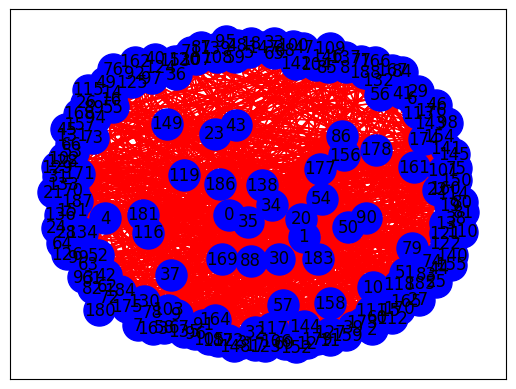

In [ ]:
G = nx.DiGraph()
for i in range(len(cossim)):
    G.add_node(i)

for i in range(len(cossim)):
    for j in range(len(cossim)):
        similarity = cossim[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G, k=2)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## 9. Menghitung PageRank


In [ ]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
    print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 181: 0.0213
Node 138: 0.0181
Node 0: 0.0177
Node 90: 0.0164
Node 178: 0.0163
Node 161: 0.0146
Node 35: 0.0145
Node 37: 0.0142
Node 164: 0.0139
Node 160: 0.0119
Node 34: 0.0107
Node 27: 0.0106
Node 103: 0.0102
Node 186: 0.0102
Node 110: 0.0099
Node 120: 0.0094
Node 57: 0.0094
Node 187: 0.0089
Node 93: 0.0089
Node 86: 0.0089
Node 43: 0.0088
Node 116: 0.0088
Node 128: 0.0087
Node 79: 0.0087
Node 17: 0.0086
Node 96: 0.0086
Node 170: 0.0085
Node 4: 0.0084
Node 67: 0.0084
Node 88: 0.0084
Node 149: 0.0084
Node 140: 0.0084
Node 54: 0.0084
Node 80: 0.0083
Node 30: 0.0082
Node 1: 0.0080
Node 20: 0.0080
Node 165: 0.0080
Node 177: 0.0080
Node 47: 0.0075
Node 38: 0.0072
Node 7: 0.0069
Node 99: 0.0069
Node 26: 0.0068
Node 119: 0.0068
Node 31: 0.0067
Node 158: 0.0067
Node 50: 0.0067
Node 173: 0.0066
Node 168: 0.0065
Node 109: 0.0064
Node 145: 0.0064
Node 104: 0.0064
Node 77: 0.0064
Node 154: 0.0063
Node 71: 0.0063
Node 81: 0.0063
Node 171: 0.0062
Node 25: 0.0061
Node 10: 0.0061
Node 

## 10. Menampilkan Tiga Node Teratas berdasarkan PageRank

In [ ]:
print("Tiga Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
  top_sentence = kata[node]
  sentence += top_sentence + ", "
  print(f"Node {node}: Page Rank = {pagerank:.4f}")
  print(f"Kalimat: {top_sentence}")

Tiga Node Tertinggi Page Rank :
Node 181: Page Rank = 0.0213
Kalimat: :
Node 138: Page Rank = 0.0181
Kalimat: ppn
Node 0: Page Rank = 0.0177
Kalimat: barang


In [ ]:
import pickle

# Contoh model (ubah ini sesuai model Anda)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Latih model dengan data (ganti dengan data Anda)
# X_train dan y_train adalah data latih Anda
# model.fit(X_train, y_train)

# Simpan model ke file .pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan ke file model.pkl")


Model berhasil disimpan ke file model.pkl
